# ¿Cuál es la mejor tarifa?

Trabajas como analista para el operador de telecomunicaciones Megaline. La empresa ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de las tarifas genera más ingresos para poder ajustar el presupuesto de publicidad.

Vas a realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Tendrás los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan, así como la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. Tu trabajo es analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos.

## 1. Inicialización

In [347]:
# Se cargan todas la librerias y funciones a utilizar en el proyecto

from scipy import stats as st
import math
import seaborn as sns
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

## 2. Cargar datos

In [348]:
# Se cargan los archivos con los datos de la muestra de la poblacion de los planes para poder realizar las pruebas de hipostesis sobre ellos.
calls_df = pd.read_csv("datasets/megaline_calls.csv")
internet_df = pd.read_csv("datasets/megaline_internet.csv")
messages_df = pd.read_csv("datasets/megaline_messages.csv")
plans_df = pd.read_csv("datasets/megaline_plans.csv")
users_df = pd.read_csv("datasets/megaline_users.csv")

## 3. Preparar los datos

A continuación se estudiaran los datos proporcionados por la compañia de telecomunicaciones acerca de la muestra de la poblacion para de esta forma poder probar la hipotesis en la cual estableceremos que ambos planes tienen la misma media de ingresos para la compañia.

[Los datos para este proyecto se dividen en varias tablas. Explora cada una para tener una comprensión inicial de los datos. Si es necesario, haz las correcciones requeridas en cada tabla.]

## 4. Tarifas

In [349]:
# Imprime la información general/resumida sobre el DataFrame de las tarifas
plans_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 260.0+ bytes


In [350]:
# Imprime una muestra de los datos para las tarifas
print(plans_df)


   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  
0               20          10             0.03            0.03      surf  
1               70           7             0.01            0.01  ultimate  


Esta tabla contiene la informacion de los planes surf y ultimate ofrecidos por la compañia megaline, por lo que son solo dos filas. Con esta tabla se puede verificar los cobros mensuales que se realizaran por cada usuarios por el uso de internet, numero de mensajes enviados y tiempo en llamadas que se pasen de lo ya establcido en los respectivos planes contratados.

En la tabla no hay datos ausentes y los tipos de datos estan bien representados en cada columna, por lo que en esta tabla no se debe de modificar mas de lo que se encuentra en defecto.

Las columnas se pueden describir de la siguiente manera:

- `messages_included`: Numero de mensajes de texto incluidos sin costo extra en el plan.
- `mb_per_month_included`: Numero de megas para navegar en internet de incluidos sin costo extra en el plan.
- `minutes_included`: Numero de minutos en llamada incluidos sin costo extra en el plan.
- `usd_monthly_pay`: Costo en dolares mensuales por el plan.
- `usd_per_gb`: Costo de cada GB extra usado en el mes para navegar en internet.
- `usd_per_message`: Costo por cada mensaje extra mandado por el usuario en el mes.
- `usd_per_minute`: Costo por cada minuto extra que se encuentre en llamada el cliente en el mes.
- `plan_name`: Nombre del plan.

## 5. Usuarios/as

In [351]:
# Imprime la información general/resumida sobre el DataFrame de usuarios
users_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [352]:
# Imprime una muestra de datos para usuarios
print(users_df.sample(5))


     user_id first_name last_name  age  \
52      1052     Edmond   Hopkins   47   
270     1270   Anjelica      Chan   70   
211     1211       Vito   Cameron   60   
192     1192      Korey   Goodwin   36   
260     1260       Alia   Aguilar   36   

                                                city    reg_date      plan  \
52          Houston-The Woodlands-Sugar Land, TX MSA  2018-03-05      surf   
270  Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA  2018-09-18  ultimate   
211        New York-Newark-Jersey City, NY-NJ-PA MSA  2018-06-30  ultimate   
192                      Buffalo-Cheektowaga, NY MSA  2018-10-02      surf   
260           Los Angeles-Long Beach-Anaheim, CA MSA  2018-12-02      surf   

    churn_date  
52         NaN  
270        NaN  
211        NaN  
192        NaN  
260        NaN  


In [353]:
print(users_df['plan'].unique())

['ultimate' 'surf']


En la tabla se puede identificar a los usuarios con algunos datos relacionados a ellos, como el numero identificador de cada usuario, la fecha de contratación y la fecha en la que dejaron el servicio.

Las columnas de la tabla se describen de la siguiente manera:
- `user_id`: Numero entero unico y secuencial identificativo del cliente.
- `first_name`: Nombre del cliente.
- `last_name`: Apellido del cliente.
- `age`: Edad del cliente.
- `city`: Ciudad de residencia del cliente.
- `reg_date`: Fecha de suscripcion del cliente en el plan de la compañia.
- `plan`: Nombre del plan que contrato el cliente.
- `churn_date`: La fecha en la que el usuario deja de usar el servicio, si el valor es nulo significa que sigue activo en el plan.

En la tabla los valores nulos de la columna `churn_date` no sera un problema en el analisis a realizar ya que nos idica que la mayoria de los clientes se enuentran con el plan activo al momento de tomar la muestra. Respecto al tipo de datos, solo se cambiaria el tipo de las columnas `reg_date` y `churn_date` para que en lugar de `strings` sean de tipo `datetime`.

[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

### 5.1. Corregir los datos

Para las columnas de datos `reg_date` y `churn_date` que se encuentran como tipo de datos string, se cambiara el tipo de datos a datetime para que concuerde con la información que almacena.

In [354]:
#Se realiza el cambio de las columnas reg_date y churn_date a tipo de datos datetime.
users_df['reg_date'] = pd.to_datetime(users_df['reg_date'], format='%Y-%m-%d')
users_df['churn_date'] = pd.to_datetime(users_df['churn_date'], format='%Y-%m-%d')

users_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  34 non-null     datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


## 6. Llamadas

In [355]:
# Imprime la información general/resumida sobre el DataFrame de las llamadas
calls_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [356]:
# Imprime una muestra de datos para las llamadas
print(calls_df.sample(5))
print()
print("Registros duplicados: ",calls_df.duplicated().sum())


              id  user_id   call_date  duration
122741   1434_25     1434  2018-08-06     12.69
119495  1416_119     1416  2018-10-14      3.39
64832    1236_96     1236  2018-09-21     11.00
41889   1153_776     1153  2018-10-19      7.37
30039   1113_297     1113  2018-07-21      4.19

Registros duplicados:  0


Esta tabla registra la duracion de las llamadas correspondientes a los usuarios de ambos planes, esto apoyara a realizar el calculo de los minutos que los usuarios usaron al mes para agregar a la cuenta final.

La descripcion de las columnas son las siguientes:

- `id`: Numero de registro unico para cada llamada conformado por el id del usuario y el numero de la llamada, separado por un guion bajo.
- `user_id`: Numero de indentificación unico de los usuarios. Se puede relacionar con la tabla users.
- `call_date`: Fecha en la que se realizo la llamada.
- `duration`: Duración en minutos de la llamada.

Con esta informacion se puede notar que no hay registros nulos o registros duplicados en la tabla. En cuanto al tipo de datos es necesario convertir la columna `call_date` de string a datetime.

[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

### 6.1. Corregir los datos

Con las observaciones que se realizaron de la tabla `calls` se realizara el cambio de tipo en la tabla, cambiando la columna call_date de string a datetime.

In [357]:
#Se realiza el cambio de la columna call_date a tipo de dato datetime.
calls_df['call_date'] = pd.to_datetime(calls_df['call_date'], format='%Y-%m-%d')

calls_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.2+ MB


### 6.2. Enriquecer los datos

Ya que las llamadas se cobran por minuto y aunque si el cliente tenga una llamada de un segundo se considera de un minuto se debe de redondear el numero flotante de la columna `duration` al entero superior.

Igualmente se obtendra el mes para cada interaccion y asi poder calcular las tarifas correspondientes a las llamadas. Esta informacion se guardara en una nueva columna llamada `month`.

In [358]:
#Se realiza el redondeo de la duracion de las llamadas para el entero arriba mas cercano.
calls_df['duration'] = calls_df['duration'].agg(math.ceil)
#Se obtiene el mes de la fecha y se guarda en una columna nueva
calls_df['month'] = calls_df['call_date'].dt.month
#Se obtiene el año de la fecha y se guarda en una columna nueva.
calls_df['year'] = calls_df['call_date'].dt.year

#Se puede ver que solo se tiene registros del año 2018
print(calls_df['year'].unique())

#Se imprime una muestra del nuevo data frame.
print(calls_df.sample(5))

[2018]
              id  user_id  call_date  duration  month  year
52073   1187_266     1187 2018-10-20        11     10  2018
6355    1030_129     1030 2018-11-29         8     11  2018
113376  1398_217     1398 2018-10-24        16     10  2018
68655   1246_674     1246 2018-05-07         5      5  2018
134054  1488_151     1488 2018-11-25         4     11  2018


C:\Users\paint\AppData\Local\Temp\ipykernel_23328\1363527577.py:2: FutureWarning: using <built-in function ceil> in Series.agg cannot aggregate and has been deprecated. Use Series.transform to keep behavior unchanged.
  calls_df['duration'] = calls_df['duration'].agg(math.ceil)


## 7. Mensajes

In [359]:
# Imprime la información general/resumida sobre el DataFrame de los mensajes
messages_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [360]:
# Imprime una muestra de datos para los mensajes
print(messages_df.sample(5))


             id  user_id message_date
69691   1454_53     1454   2018-12-24
38056  1251_108     1251   2018-10-06
70171   1456_54     1456   2018-12-18
32124  1199_315     1199   2018-10-14
53551   1340_77     1340   2018-12-16


Esta tabla realiza el registro de los mensajes enviados por cada usuario registrando la fecha, con el conteo de los mismos se puede verificar si se ha sobrepasado el numero de mensajes incluidos en el plan y asi sumar los extras para poder calcular la tarifa.

Las columnas se decriben de la siguiente manera:
-`id`: Identificador unico para cada mensaje, se compone del numero de usuario y numero de mensaje separado por un guion bajo.
-`user_id`: Identificador unico de cada cliente, se puede relacionar con la tabla users.
-`message_date`: Fecha en la que se envio el mensaje.

En la tabla solo se puede notar que el tipo de la columna `message_date` debe de ser cambiado de tipo string a tipo datetime.

### 7.1 Corregir los datos

Se corrige la fecha de dato string a dato datetime.

In [361]:
messages_df['message_date'] = pd.to_datetime(messages_df['message_date'], format='%Y-%m-%d')

messages_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.7+ MB


### 7.2. Enriquecer los datos

Se agregara una columna nueva para poder clasificar los mensajes al mes correspondiente al que se enviaron. la nueva columna tendra el nombre de `month`.

In [362]:
#Se obtiene el mes de la fecha y se guarda en una columna nueva
messages_df['month'] = messages_df['message_date'].dt.month
#Se obtiene el año de la fecha y se guarda en una columna nueva.
messages_df['year'] = messages_df['message_date'].dt.year

#Se puede ver que solo se tiene registros del año 2018
print(messages_df['year'].unique())

#Se imprime una muestra del nuevo data frame.
print(messages_df.sample(5))

[2018]
             id  user_id message_date  month  year
15774  1103_138     1103   2018-10-16     10  2018
69937  1454_299     1454   2018-11-19     11  2018
12759  1083_124     1083   2018-12-10     12  2018
7770   1060_106     1060   2018-08-16      8  2018
49907  1328_865     1328   2018-07-19      7  2018


## 8. Internet

In [363]:
# Imprime la información general/resumida sobre el DataFrame de internet
internet_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [364]:
# Imprime una muestra de datos para el tráfico de internet
print(internet_df.sample(5))


             id  user_id session_date  mb_used
92588  1432_111     1432   2018-10-29   365.80
5939     1033_0     1033   2018-12-10     0.00
27960  1128_114     1128   2018-12-28   108.13
23945  1110_203     1110   2018-12-25   729.51
16554   1074_64     1074   2018-12-23     0.00


Con esta tabla se puede conocer los datos usados por los usuarios en sesiones de conexion durante el mes.

Las columnas se describen de la siguiente manera:
-`id`: Identificador unico de cada sesion de conexion con los datos de internet, conformado por el id de usuario y el numero de conexion separados por un guion bajo.
-`user_id`: Identificador de cada usuario, se puede relacionar a la tabla users.
-`session_date`: Fecha en la que se realizo la conexion a internet desde el equipo con el plan contratado.
-`mb_used`: Numero de mb que se usaron en la conexion realizada.

Lo primero que se nota es que la fecha debe de ser cambiada de tipo string a tipo datetime.

Se realiza el cambio de tipo de la columna `session_date` de string a datetime.

In [365]:
internet_df['session_date'] = pd.to_datetime(internet_df['session_date'], format='%Y-%m-%d')

internet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 3.2+ MB


### 8.2. Enriquecer los datos

Se obtiene el mes correspondiente a la session de conexion a internet para poder realizar los calculos correspondientes.
La nueva columna se queda con el nombre de `month`

In [366]:
#Se obtiene el mes de la fecha y se guarda en una columna nueva
internet_df['month'] = internet_df['session_date'].dt.month
#Se obtiene el año de la fecha y se guarda en una columna nueva.
internet_df['year'] = internet_df['session_date'].dt.year

#Se puede ver que solo se tiene registros del año 2018
print(internet_df['year'].unique())

#Se imprime una muestra del nuevo data frame.
print(internet_df.sample(5))

[2018]
             id  user_id session_date  mb_used  month  year
46821   1209_14     1209   2018-09-19   818.23      9  2018
89997  1415_101     1415   2018-08-16   290.70      8  2018
34855  1156_452     1156   2018-11-24   520.01     11  2018
87473  1405_256     1405   2018-12-13   224.86     12  2018
52962   1239_71     1239   2018-12-30   800.02     12  2018


## 9. Estudiar las condiciones de las tarifas

A continuacion se estudiaran las condiciones de cada plan (surf y ultimate) para poder verificar que se entiende completamente la facturaacion de ambos planes y asi poder calcular perfectamente cada interaccion de los clientes de esta poblacion.

In [367]:
# Imprime las condiciones de la tarifa y asegúrate de que te quedan claras
print(plans_df)


   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  
0               20          10             0.03            0.03      surf  
1               70           7             0.01            0.01  ultimate  


A continuación se pueden ver la descripción de las tarifas:

**Surf**

- Pago mensual: $20.
- 500 minutos al mes, 50 SMS y 15 GB de datos.
- Si se exceden los límites del paquete:
    - 1 minuto: 3 centavos.
    - 1 SMS: 3 centavos.
    - 1 GB de datos: $10.

**Ultimate**

- Pago mensual: $70.
- 3000 minutos al mes, 1000 SMS y 30 GB de datos.
- Si se exceden los límites del paquete:
    - 1 minuto: 1 centavo.
    - 1 SMS: 1 centavo.
    - 1 GB de datos: $7.

Nota: Megaline redondea los segundos a minutos y los megabytes a gigabytes. Para las llamadas, cada llamada individual se redondea: incluso si la llamada duró solo un segundo, se contará como un minuto. Para el tráfico web, las sesiones web individuales no se redondean. En vez de esto, el total del mes se redondea hacia arriba. Si alguien usa 1025 megabytes este mes, se le cobrarán 2 gigabytes.

## 10. Agregar datos por usuario



In [368]:
# Calcula el número de llamadas hechas por cada usuario al mes. Guarda el resultado.
number_calls_df = calls_df.groupby(by=['user_id', 'month'])['id'].count()
print(number_calls_df)


user_id  month
1000     12       16
1001     8        27
         9        49
         10       65
         11       64
                  ..
1498     12       39
1499     9        41
         10       53
         11       45
         12       65
Name: id, Length: 2258, dtype: int64


In [369]:
# Calcula la cantidad de minutos usados por cada usuario al mes. Guarda el resultado.
minutes_in_call_df = calls_df.groupby(by=['user_id','month'])['duration'].sum()
#minutes_in_call_df = pd.pivot_table(calls_df, values='duration', index='user_id', columns='month', aggfunc='sum')

print(minutes_in_call_df)

user_id  month
1000     12       124
1001     8        182
         9        315
         10       393
         11       426
                 ... 
1498     12       339
1499     9        346
         10       385
         11       308
         12       496
Name: duration, Length: 2258, dtype: int64


In [370]:
# Calcula el número de mensajes enviados por cada usuario al mes. Guarda el resultado.
number_messages_df = messages_df.groupby(by=['user_id', 'month'])['id'].count()
#number_messages_df = pd.pivot_table(messages_df, values='id', index='user_id', columns='month', aggfunc='count')
print(number_messages_df)

user_id  month
1000     12       11
1001     8        30
         9        44
         10       53
         11       36
                  ..
1496     9        21
         10       18
         11       13
         12       11
1497     12       50
Name: id, Length: 1806, dtype: int64


In [371]:
# Calcula el volumen del tráfico de Internet usado por cada usuario al mes. Guarda el resultado.
mb_used_df = internet_df.groupby(by=['user_id','month'])['mb_used'].sum()
# mb_used_df = pd.pivot_table(internet_df, values='mb_used', index='user_id', columns='month', aggfunc='sum')
print(mb_used_df)

user_id  month
1000     12        1901.47
1001     8         6919.15
         9        13314.82
         10       22330.49
         11       18504.30
                    ...   
1498     12       23137.69
1499     9        12984.76
         10       19492.43
         11       16813.83
         12       22059.21
Name: mb_used, Length: 2277, dtype: float64


Se fusionan los datos obtenidos de cada dataframe para asi poder concentrar toda la informacion en un solo dataframe.

In [372]:
# Fusiona los datos de llamadas, minutos, mensajes e Internet con base en user_id y month
facturable_df = pd.concat([minutes_in_call_df, number_messages_df, mb_used_df], axis=1)

facturable_df.rename(columns={'duration': 'minutes_used', 'id': 'messages_used'}, inplace=True)

#facturable_df.fillna(0, inplace=True)

facturable_df = facturable_df.reset_index()
print(facturable_df)


      user_id  month  minutes_used  messages_used   mb_used
0        1000     12         124.0           11.0   1901.47
1        1001      8         182.0           30.0   6919.15
2        1001      9         315.0           44.0  13314.82
3        1001     10         393.0           53.0  22330.49
4        1001     11         426.0           36.0  18504.30
...       ...    ...           ...            ...       ...
2288     1349     12           NaN           61.0  13039.91
2289     1361      5           NaN            2.0   1519.69
2290     1482     10           NaN            2.0       NaN
2291     1108     12           NaN            NaN    233.17
2292     1311      6           NaN            NaN   1498.83

[2293 rows x 5 columns]


In [373]:
# Añade la información de la tarifa
# Se obtiene el plan adquirido por cliente
plan_by_user = users_df[['user_id', 'plan', 'city']]
# Con esto se añade la facturacion del plan a cada usuario
plan_by_user = plan_by_user.merge(plans_df, left_on='plan', right_on='plan_name')
# Se quita la columna repetida
plan_by_user.drop(['plan'], axis=1, inplace=True)
# Se verifica el resultado
print(plan_by_user)


     user_id                                       city  messages_included  \
0       1000      Atlanta-Sandy Springs-Roswell, GA MSA               1000   
1       1001            Seattle-Tacoma-Bellevue, WA MSA                 50   
2       1002       Las Vegas-Henderson-Paradise, NV MSA                 50   
3       1003                              Tulsa, OK MSA                 50   
4       1004            Seattle-Tacoma-Bellevue, WA MSA                 50   
..       ...                                        ...                ...   
495     1495  New York-Newark-Jersey City, NY-NJ-PA MSA                 50   
496     1496               New Orleans-Metairie, LA MSA                 50   
497     1497     Los Angeles-Long Beach-Anaheim, CA MSA               1000   
498     1498  New York-Newark-Jersey City, NY-NJ-PA MSA                 50   
499     1499          Orlando-Kissimmee-Sanford, FL MSA                 50   

     mb_per_month_included  minutes_included  usd_monthly_pay  

In [374]:
#facturable2_df = facturable_df.merge(plan_by_user, left_index=True)
facturable2_df = pd.merge(facturable_df, plan_by_user, on='user_id')

print(facturable2_df)

      user_id  month  minutes_used  messages_used   mb_used  \
0        1000     12         124.0           11.0   1901.47   
1        1001      8         182.0           30.0   6919.15   
2        1001      9         315.0           44.0  13314.82   
3        1001     10         393.0           53.0  22330.49   
4        1001     11         426.0           36.0  18504.30   
...       ...    ...           ...            ...       ...   
2288     1349     12           NaN           61.0  13039.91   
2289     1361      5           NaN            2.0   1519.69   
2290     1482     10           NaN            2.0       NaN   
2291     1108     12           NaN            NaN    233.17   
2292     1311      6           NaN            NaN   1498.83   

                                           city  messages_included  \
0         Atlanta-Sandy Springs-Roswell, GA MSA               1000   
1               Seattle-Tacoma-Bellevue, WA MSA                 50   
2               Seattle-Tacoma-Be

Ya que se tiene todo lo necesario para el calculo del cobro mensual que se realizo al ciente, se generara una funcion para aplicarse a cada una de las filas que existen en la tabla.

Con esto ya se podra verificar el promedio de los cobros que se realizan correspondiente a cada plan.

In [375]:
# Calcula el ingreso mensual para cada usuario

# Se define funcion para obtener el cobro mensual a los clientes
def calculate_mensual_income(row):
    #El cobro inicial es el precio del plan
    payment = row['usd_monthly_pay']
    
    #Si sobre pasa los minutos en llamadas, se agrega al pago cada minuto extra.
    if row['minutes_used'] > row['minutes_included']:
        payment += (row['minutes_used'] - row['minutes_included']) * row['usd_per_minute']

    #Si el numero de mensajes enviados sobre pasa los incluidos se cobra cada extra al pago.
    if row['messages_used'] > row['messages_included']:
        payment += (row['messages_used'] - row['messages_included']) * row['usd_per_message']

    #Si los megas sobre pasa, se añade cada 1024 como un gb extra, por eso al dividir y obtener el numero entero mas arriba se puede calcular 
    #cada GB extra usado.
    if row['mb_used'] > row['mb_per_month_included']:
        extra_gb = math.ceil((row['mb_used'] - row['mb_per_month_included']) / 1024)
        payment += extra_gb * row['usd_per_gb']

    return payment

In [376]:
# Se agrega la columna de 'payment' para agregar el valor pagado por el cliente al haber usado su plan.
facturable2_df['payment'] = facturable2_df.apply(calculate_mensual_income, axis=1)


In [377]:
print(facturable2_df[['user_id', 'month', 'payment', 'plan_name']].sample(5))

      user_id  month  payment plan_name
1484     1329      9     70.0  ultimate
1881     1408      8     50.0      surf
1161     1252     10     40.0      surf
665      1144     10    126.0  ultimate
414      1088      7     70.0  ultimate


## 13. Estudia el comportamiento de usuario

Se realizaran calculos con los datos y se realizaran descripciones de los mismos por cada categoria agregada a los planes de la compañia Megaline.

Se analizan las llamdas, los mensajes y los datos de internet usados por los usuarios de cada plan, con esto se finalizara con el analisis de los ingresos correspondientes a cada plan.

### 13.1 Llamadas

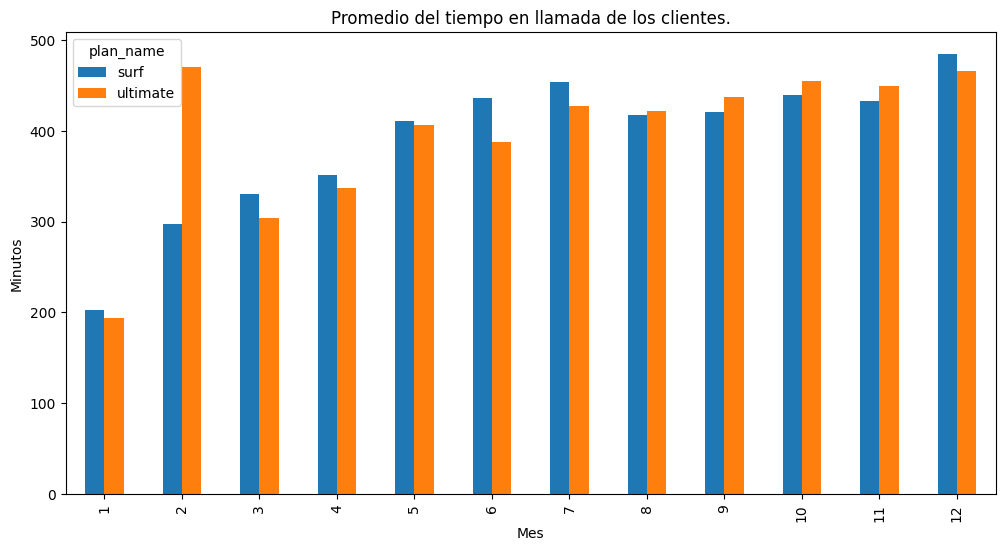

In [378]:
# Compara la duración promedio de llamadas por cada plan y por cada mes. Traza un gráfico de barras para visualizarla.
average_in_call_df = pd.pivot_table(facturable2_df, values='minutes_used', index='month', columns='plan_name', aggfunc='mean')

average_in_call_df.plot(kind='bar', title='Promedio del tiempo en llamada de los clientes.',
                        xlabel='Mes', ylabel='Minutos', figsize=[12,6])

plt.show()

En la tabla se puede notar que el promedio del tiempo en llamadas no varia mucho entre cada plan, al tener mas minutos incluidos en el plan ultimate se pensaria que tendran un promedio mayor de minutos en llamdas como paso en el mes de febrero, pero incluso en la mayoria de meses los usuarios del plan surf tienen un promedio mayor del tiempo en llamadas.

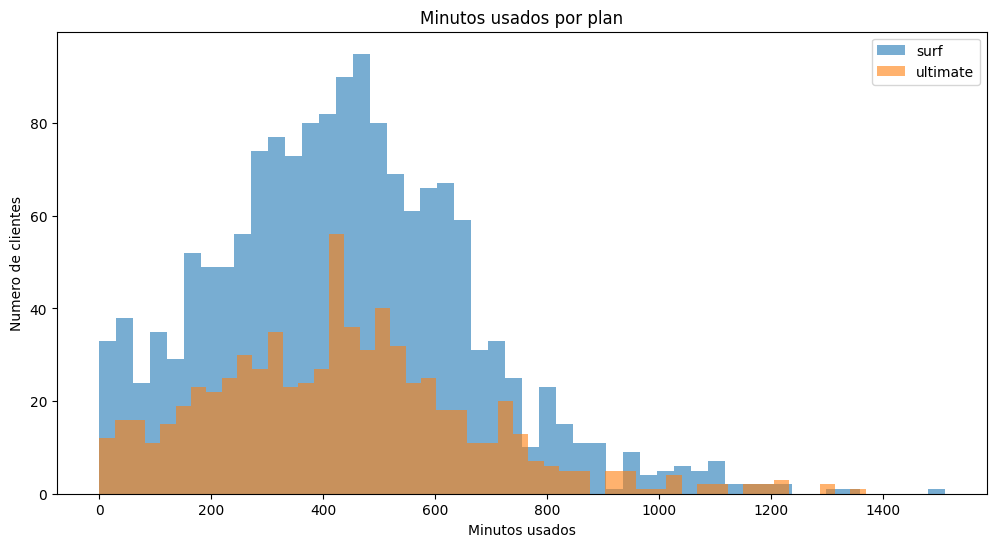

In [379]:
# Compara el número de minutos mensuales que necesitan los usuarios de cada plan. Traza un histograma.
# Se crean df con los datos de cada plan
users_ultimate_df = facturable2_df[facturable2_df['plan_name'] == 'ultimate']
users_surf_df = facturable2_df[facturable2_df['plan_name'] == 'surf']

#Se crea una tabla para cada tipo de plan y se presentan en un solo histograma
users_surf_df['minutes_used'].plot(title='Minutos usados por plan', kind='hist',  
                                   bins=50, figsize=[12, 6], alpha=0.6, legend=True)
users_ultimate_df['minutes_used'].plot(kind='hist', alpha=0.6, bins=50, legend=True,
                                       xlabel='Minutos usados', ylabel='Numero de clientes')

plt.legend(['surf', 'ultimate'])
plt.show()

En la grafica se puede notar que hay una menor cantidad de usuarios del plan ultimate, y que parecen portarse de la misma manera en cuanto al tiempo en llamadas y aunque se pensaria que los del plan surf no quisieran sobrepasar los 500 minutos incluidos, muchos usuarios sobrepasan esa cantidad, y aunque los del plan ultimate tienen 3000 minutos, ninguno se acerca siquiera a la mitad de sus minutos incluidos.

In [380]:
# Calcula la media y la varianza de la duración mensual de llamadas.
avg_us = users_surf_df['minutes_used'].mean()
avg_uu = users_ultimate_df['minutes_used'].mean()

var_us = np.var(users_surf_df['minutes_used'])
var_uu = np.var(users_ultimate_df['minutes_used'])

print('En cuanto la duracion mensual de llamadas:')
print(' - La media de los usuarios surf es', avg_us, 'y la varianza es igual a', var_us)
print(' - La media de los usuarios ultimate es', avg_uu, 'y la varianza es igual a', var_uu)


En cuanto la duracion mensual de llamadas:
 - La media de los usuarios surf es 436.51974110032364 y la varianza es igual a 52537.03666530514
 - La media de los usuarios ultimate es 434.67601683029454 y la varianza es igual a 56494.286339253566


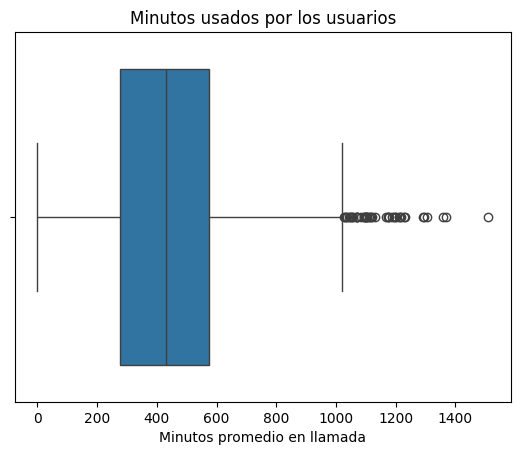

In [381]:
# Traza un diagrama de caja para visualizar la distribución de la duración mensual de llamadas
sns.boxplot(facturable2_df['minutes_used'], orient='h')
plt.title('Minutos usados por los usuarios')
plt.xlabel('Minutos promedio en llamada')
plt.show()


Con los datos que tenemos en esta muestra se puede notar que los clientes con ambos planes se comportan de una manera muy similar y en promedio los usuarios no sobre pasan el limite de minutos incluidos en el plan surf, pero aun asi hay bastantes usuarios del plan surf que prefieren sobrepasar los minutos y pagar el tiempo extra en el precio de su plan.

En cuanto a los usuarios del plan ultimate no llegan a pagar extra por las llamadas en su factura ya que no llegan a los 3000 minutos usables en su plan.


### 13.2 Mensajes

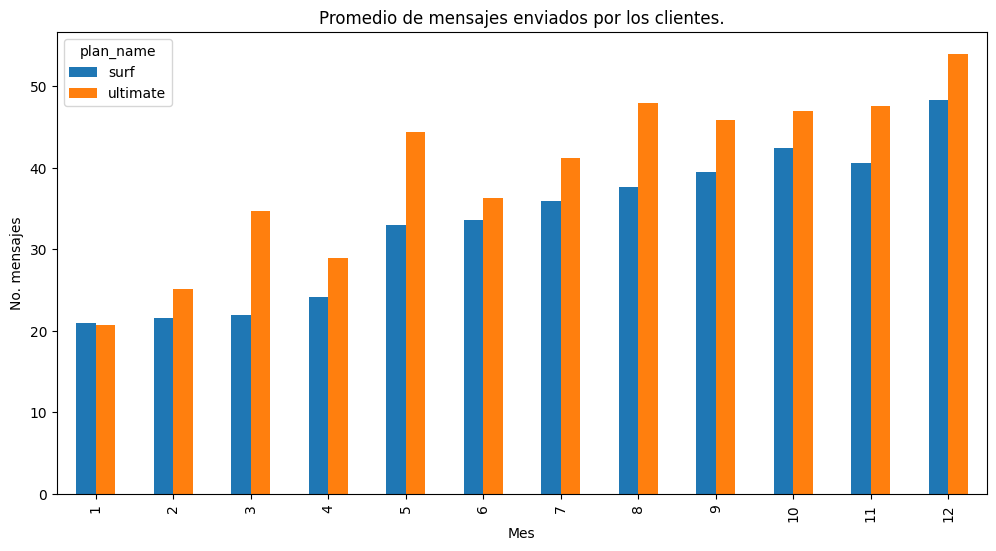

In [382]:
# Comprara el número de mensajes que tienden a enviar cada mes los usuarios de cada plan
number_of_messages_df = pd.pivot_table(facturable2_df, values='messages_used', index='month', columns='plan_name', aggfunc='mean')

number_of_messages_df.plot(kind='bar', title='Promedio de mensajes enviados por los clientes.',
                        xlabel='Mes', ylabel='No. mensajes', figsize=[12,6])

plt.show()


En la tabla se puede notar que los usuarios del plan ultimate si suelen usar mas mensajes que los del plan surf, entendible ya que el plan surf incluye muhcos mas mensajes en su tarifa. Aunque aun asi, el promedio se queda cerca del limite para el plan surf en ambos tipos de clientes.

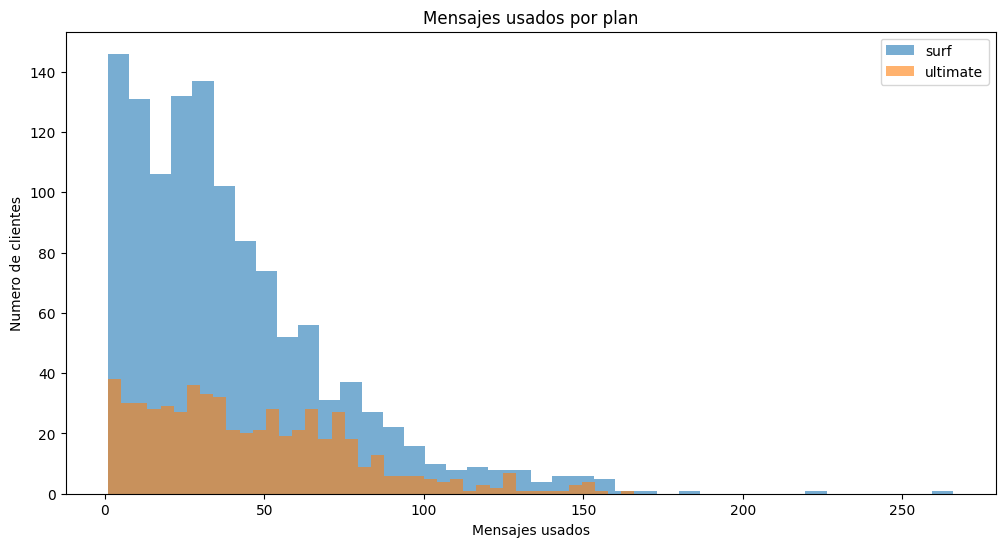

In [383]:
# Se compara el uso de cada usuario en el numero de mensajes.
#Se crea una tabla para cada tipo de plan y se presentan en un solo histograma
users_surf_df['messages_used'].plot(title='Mensajes usados por plan', kind='hist',  
                                   bins=40, figsize=[12, 6], alpha=0.6, legend=True)
users_ultimate_df['messages_used'].plot(kind='hist', alpha=0.6, bins=40, legend=True,
                                        xlabel='Mensajes usados', ylabel='Numero de clientes')

plt.legend(['surf', 'ultimate'])
plt.show()



El uso de los mensajes por parte de los usuarios no parece seguir una distribucion normal, esta claro que no utilizan muchos mensajes la mayoria y por eso el promedio esta en menos de 50 para la mayoria de usuarios, pero parece una grafica exponencial negativa.

In [384]:
# Calcula la media y la varianza del envio de mensaje mensual de los usuarios.
avg_us = users_surf_df['messages_used'].mean()
avg_uu = users_ultimate_df['messages_used'].mean()

var_us = np.var(users_surf_df['messages_used'])
var_uu = np.var(users_ultimate_df['messages_used'])

print('En cuanto al envio de mensajes mensual los usuarios:')
print(' - La media de los usuarios surf es', avg_us, 'y la varianza es igual a', var_us)
print(' - La media de los usuarios ultimate es', avg_uu, 'y la varianza es igual a', var_uu)

En cuanto al envio de mensajes mensual los usuarios:
 - La media de los usuarios surf es 40.10965630114566 y la varianza es igual a 1090.4511506183685
 - La media de los usuarios ultimate es 46.29623287671233 y la varianza es igual a 1083.3249173156314


Al no ser una distribucion normal se puede ver que la varianza es bastante alta para ambos tipos de planes.

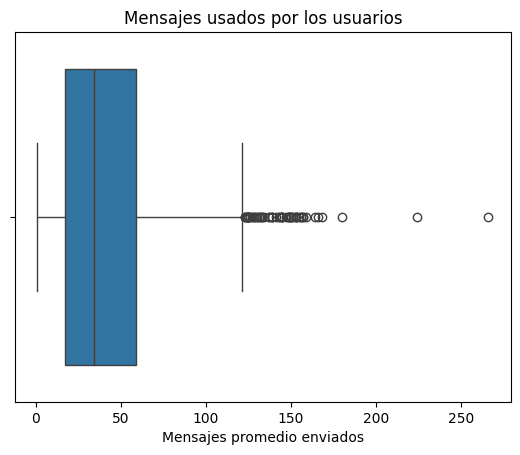

In [385]:
# Traza un diagrama de caja para visualizar la distribución del uso de mensajes.
sns.boxplot(facturable2_df['messages_used'], orient='h')
plt.title('Mensajes usados por los usuarios')
plt.xlabel('Mensajes promedio enviados')
plt.show()

En cuanto al comportamiento de los usuarios en el envio de mensajes es mas dificil de predecir ya que la distribucion de los usuarios no es una normal, y se puede notar en la grafica de caja que los valores estan bastante pegados a la izquierda por lo que la mayoria de usuariosse quedan dentro del limite de 50 mensajes, pero hay casos en los que los usuarios sobrepasan ese limite incluido en su plan pagando extra por cada mensaje.

En cuanto a los usuarios ultimate no estan cerca de su limite de 1000 mensajes incluidos.

### 13.3 Internet

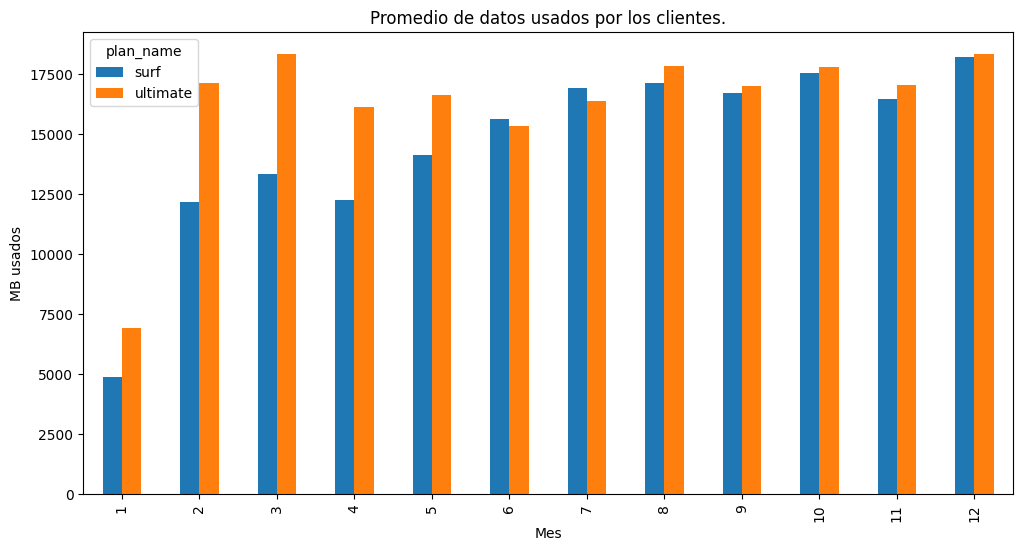

In [386]:
# Compara la cantidad de tráfico de Internet consumido por usuarios por plan
internet_used_df = pd.pivot_table(facturable2_df, values='mb_used', index='month', columns='plan_name', aggfunc='mean')

internet_used_df.plot(kind='bar', title='Promedio de datos usados por los clientes.',
                        xlabel='Mes', ylabel='MB usados', figsize=[12,6])

plt.show()

Se puede ver en la tabla que los usuarios de los planes en promedio usan cerca de la misma cantidad de megas, se esperaria que los usuarios del plan ultimate usen muchos mas megas ya que tienen el doble usable que los del plan surf, pero solo se puede ver una gran diferencia en los primeros meses.

Igualmente se puede ver que los usuarios del plan surf en promedio sobrepasan el limite de 15GB de sus planes, por lo que indica un costo extra.

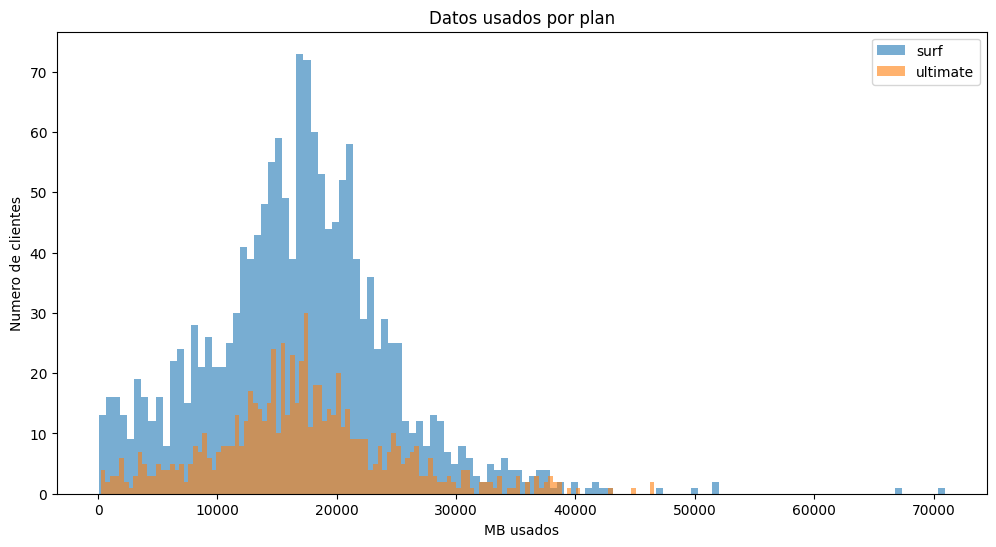

In [387]:
# Se compara el uso de megas de inter po cada usuario.
#Se crea una tabla para cada tipo de plan y se presentan en un solo histograma
users_surf_df['mb_used'].plot(title='Datos usados por plan', kind='hist',  
                                   bins=120, figsize=[12, 6], alpha=0.6, legend=True)
users_ultimate_df['mb_used'].plot(kind='hist', alpha=0.6, bins=120, legend=True,
                                  xlabel='MB usados', ylabel='Numero de clientes')

plt.legend(['surf', 'ultimate'])
plt.show()

Se puede ver una distribucion normal en la grafica ligeramente sesgada a la izquierda para los del plan surf, en el plan ultimate se puede ver una normal mas centrada.

Igualmente se puede notar que muchos usuarios del plan surf sobrepasan el limite de datos y que los usuarios del plan ultimate sobrepasan el limite de 30GB de sus planes, siendo los cobros extras a este plan solamente por exceso de datos.


In [388]:
# Calcula la media y la varianza del consumo de internet mensual de los usuarios.
avg_us = users_surf_df['mb_used'].mean()
avg_uu = users_ultimate_df['mb_used'].mean()

var_us = np.var(users_surf_df['mb_used'])
var_uu = np.var(users_ultimate_df['mb_used'])

print('En cuanto al uso de datos de internet mensual los usuarios:')
print(' - La media de los usuarios surf es', avg_us, 'y la varianza es igual a', var_us)
print(' - La media de los usuarios ultimate es', avg_uu, 'y la varianza es igual a', var_uu)

En cuanto al uso de datos de internet mensual los usuarios:
 - La media de los usuarios surf es 16717.702137355584 y la varianza es igual a 62128323.16300871
 - La media de los usuarios ultimate es 17238.642253129346 y la varianza es igual a 61239556.12006475


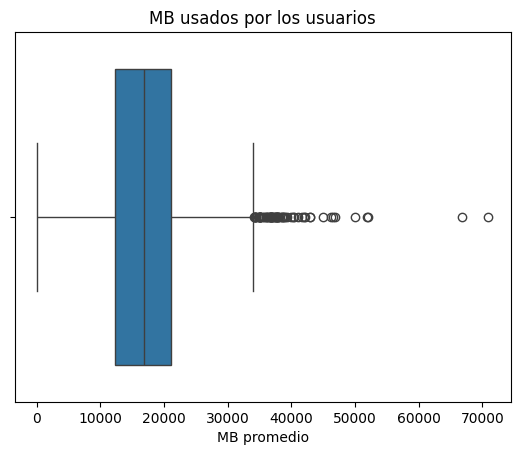

In [389]:
# Traza un diagrama de caja para visualizar la distribución del uso mensual de MB.
sns.boxplot(facturable2_df['mb_used'], orient='h')
plt.title('MB usados por los usuarios')
plt.xlabel('MB promedio')
plt.show()

En cuanto al uso de los datos por los usuarios de ambos planes no parece haber mucha diferencia en el promedio del uso de MB, si hay un promedio mayor de uso por parte de los usuarios ultimate pero no tan grande al tener el doble de MB incluidos pagando el precio del plan.

## 14. Ingreso

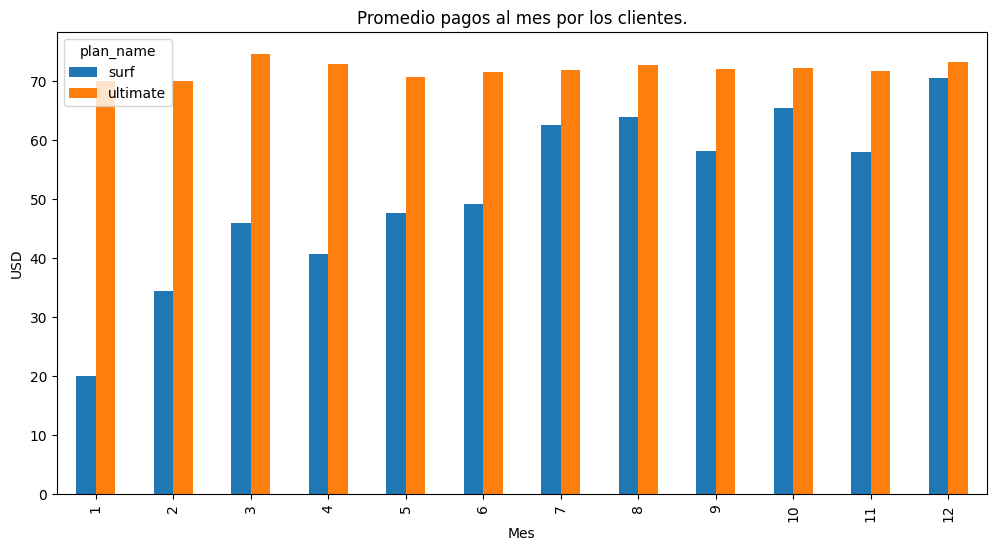

In [390]:
# Compara la cantidad de tráfico de Internet consumido por usuarios por plan
internet_used_df = pd.pivot_table(facturable2_df, values='payment', index='month', columns='plan_name', aggfunc='mean')

internet_used_df.plot(kind='bar', title='Promedio pagos al mes por los clientes.',
                        xlabel='Mes', ylabel='USD', figsize=[12,6])

plt.show()

En el precio de los planes se puede ver que los usuarios del plan surf pagan mucho mas de los 20 dolares que cuesta tener el plan en promedio y que los usuarios del plan ultimate no sobrepasan mucho el precio de 70 dolares del precio del plan.

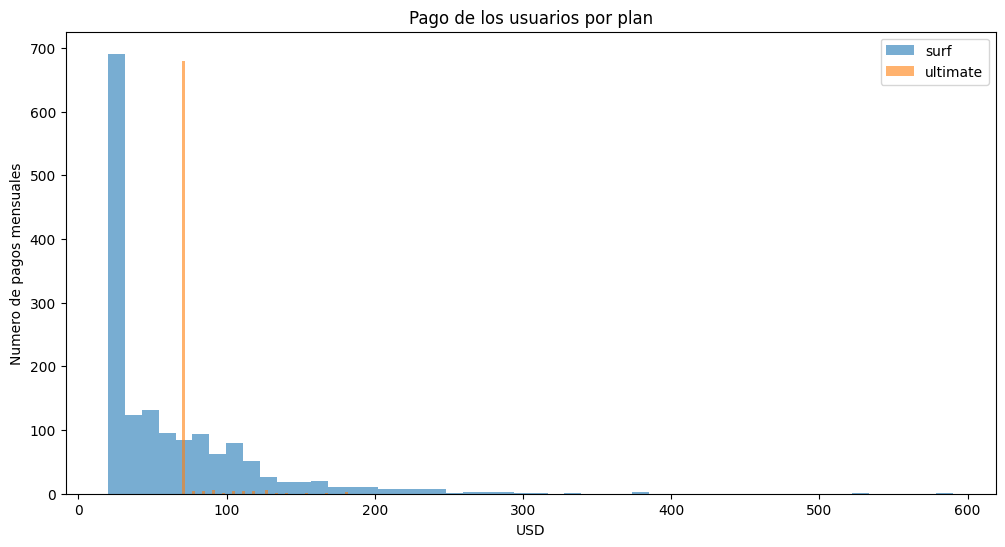

In [391]:
# Se compara el uso de megas de inter po cada usuario.
#Se crea una tabla para cada tipo de plan y se presentan en un solo histograma
users_surf_df['payment'].plot(title='Pago de los usuarios por plan', kind='hist',  
                                   bins=50, figsize=[12, 6], alpha=0.6, legend=True)
users_ultimate_df['payment'].plot(kind='hist', alpha=0.6, bins=50, legend=True,
                                    xlabel='USD', ylabel='Numero de pagos mensuales',)

plt.legend(['surf', 'ultimate'])
plt.show()

Se puede ver que la mayoria de pagos de los clientes de ambos plane esta de acuerdo a lo que contrataron de 20 dolares para los usuarios surf y de 70 para los usuarios ultimate, pero de los usarios del plan surf sobrepasan por mucho lo incluido en su plan y llegan a pagar hasta 200 - 300 dolares al mes

In [392]:
# Calcula la media y la varianza del consumo de internet mensual de los usuarios.
avg_us = users_surf_df['payment'].mean()
avg_uu = users_ultimate_df['payment'].mean()

var_us = np.var(users_surf_df['payment'])
var_uu = np.var(users_ultimate_df['payment'])

print('En cuanto al pago mensual los usuarios:')
print(' - La media de los usuarios surf es', avg_us, 'y la varianza es igual a', var_us)
print(' - La media de los usuarios ultimate es', avg_uu, 'y la varianza es igual a', var_uu)

En cuanto al pago mensual los usuarios:
 - La media de los usuarios surf es 60.706408137317226 y la varianza es igual a 3065.8848438690247
 - La media de los usuarios ultimate es 72.31388888888888 y la varianza es igual a 129.66814043209877


Para estos planes se puede ver que los usuarios del plan surf pagan alrededor de 3 veces mas en promedio de lo que el plan vale y que los usuarios del plan ultimate es muy extraño que paguen mas de los que vale este plan.

## 15. Prueba las hipótesis estadísticas

### 15.1 Prueba por tipo de plan
Se realizara la prueba de que los ingresos mensuales de ambos planes son diferentes, con respecto a la poblacion obtenida y el calculo de su pago mensual por el uso de su paquete de llamadas, mensajes y uso de datos de internet.

Para probar que los ingresos son significativamente diferentes se realizara la siguiente prueba:
- Hipotesis nula: "Los ingresos no tienen ninguna diferencia".
- Prueba estadistica de dos colas
- Alpha de prueba: 0.01

In [393]:
# Prueba las hipótesis
results = st.ttest_ind(users_surf_df['payment'], users_ultimate_df['payment'], equal_var=False)
alpha = 0.01

print('Valor p:', results.pvalue)

if (results.pvalue < alpha):
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")


Valor p: 3.170390548113574e-15
Rechazamos la hipótesis nula


Se puede decir que se rechaza la hipotesis nula y si existe una diferencia en los ingresos por parte de los usuarios del plan surf y los usuarios del plan ultimate, por lo que se puede decir que ambos planes contribuyen de una manera muy diferente a los ingresos de la compañia megaline.

### 15.2. Prueba por ciudad de residencia
Se realizara la prueba de que los ingresos mensuales de la ciudad de NY - NJ son mayores con respecto al resto de la poblacion obtenida con el calculo de su pago mensual por el uso de su paquete de llamadas, mensajes y uso de datos de internet.

Para probar que los ingresos son significativamente diferentes se realizara la siguiente prueba:
- Hipotesis nula: "Los ingresos no tienen ninguna diferencia".
- Prueba estadistica de dos colas.
- Alpha de prueba: 0.01

In [394]:
# Prueba las hipótesis
# Se obtienen dataframes para poder comparar los datos.
user_in_NY_NJ_df = facturable2_df[facturable2_df['city'].str.contains('NY-NJ', case=False)]
user_not_in_NY_NJ_df = facturable2_df[~(facturable2_df['city'].str.contains('NY-NJ', case=False))]

# Prueba las hipótesis
results = st.ttest_ind(user_in_NY_NJ_df['payment'], user_not_in_NY_NJ_df['payment'], equal_var=False)
alpha = 0.01

print('Valor p:', results.pvalue)

if (results.pvalue < alpha):# su código: compara los valores p obtenidos con el nivel de significación estadística):
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")



Valor p: 0.0335256158853001
No podemos rechazar la hipótesis nula


In [395]:
avg_us = user_in_NY_NJ_df['payment'].mean()
avg_uu = user_not_in_NY_NJ_df['payment'].mean()

var_us = np.var(user_in_NY_NJ_df['payment'])
var_uu = np.var(user_not_in_NY_NJ_df['payment'])

print('En cuanto al pago mensual los usuarios:')
print(' - La media de los usuarios en NY-NJ es', avg_us, 'y la varianza es igual a', var_us)
print(' - La media de los usuarios en otras regiones es', avg_uu, 'y la varianza es igual a', var_uu)

En cuanto al pago mensual los usuarios:
 - La media de los usuarios en NY-NJ es 59.921352785145885 y la varianza es igual a 1890.5177172681156
 - La media de los usuarios en otras regiones es 65.2227713987474 y la varianza es igual a 2223.8866958162175


Con esta prueba estadistica se puede rechazar la hipotesis nula ya que la probabilidad de que sean iguales es lo suficientemente alta como para decir que no importa la localidad del usuario para validar que los ingresos de esa ciudad sea diferente.

## Conclusión general

Para el cliente Megaline es importante verificar si hay una diferencia significativa en el ingreso de los planes, y se puede verificar que en la muestra para ambos planes, los usuarios no llegan a sobrepasar el limite de mensajes o minutos en llamadas del plan ultimate, lo que mas llegan a usar los clientes y por lo que mas ingresos se puede llegar a generar es por el uso de datos de internet.

Esto influye mucho que un usuario del plan surf suba de sus $20 pactados a mas de $60 que es el promedio de pagos recibidos por parte de los clientes del plan surf.

Las suposiciones iniciales de mi parte seria que los usuarios del plan ultimate, usarian los servicios mucho mas que los del plan surf, pero en muchos de los casos los usuarios de ambos planes usan en promedio la misma cantidad de mensajes, llamadas y en mb se separan un poco mas pero no lo esperado.

Igualmenete con las representaciones visuales del uso de ambos se puede ver que muchos usuarios del plan surf sobrepasan por mucho lo que tienen incluido en los planes, en cuanto al pago mensual, no esperaba ver pagos cerca de los $580 de un usuario surf, pero al tener un costo mas elevado por pasar de las tres categorias es bastante comprensible que un usuario de este plan pueda llegar a tales cantidades y un usuario del plan ultimate no lo haga.

Finalizando se puede ver que si hay una gran diferencia en ambos ingresos y se popondria meter mas publicidad al plan ultimate, ya que aunque hay usuarios del plan surf que llegan a pagar mucho mas que éste, el promedio de ingresos es mayor y lo suficientemente alejado como para decir que el plan ultimate genera mas ingresos a la compañia. 